In [1]:
#import required modules
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
#get mitochondrial genome informations
mtdnas=pd.read_csv('../../data/organelles.csv',index_col=0)
mtdnas=mtdnas.loc[['Mus musculus LP/J','Mus musculus C3H/HeJ','Mus musculus BALB/cJ','Mus musculus A/J',
                  'Mus musculus castaneus CAST/EiJ','Mus musculus NOD/ShiLtJ','Mus musculus domesticus AKR/J',
                  'Mus musculus domesticus WSB/EiJ','Mus musculus DBA/2J','Mus musculus 129S1/SvImJ',
                  'Mus musculus musculus PWK/PhJ','Mus musculus CBA/J','Mus musculus NZO/HiLtJ',
                  'Mus musculus FVB/NJ','Mus musculus C57BL/6NJ','Mus spretus SPRET/EiJ']]
mtdnas=mtdnas[~mtdnas.index.duplicated(keep='first')]
mtdnas.index=pd.Series(mtdnas.index.values).apply(lambda name:name.split(' ')[-1].lower().replace('/',''))

In [4]:
#load numts csv files
def read_dfs(filename):
    try:
        df=pd.read_csv(f'/Volumes/motilin/balint/numt/mice_strains_numt/csvs/{filename}')
        return df
    except:
        return np.nan
    
dfs=pd.Series(os.listdir('/Volumes/motilin/balint/numt/mice_strains_numt/csvs/')).apply(read_dfs)
dfs.index=pd.Series(os.listdir('/Volumes/motilin/balint/numt/mice_strains_numt/csvs/')).apply(lambda filename:filename[:-10])
dfs=dfs.dropna()
dfs=dfs.drop('Mus_musculus')
dfs

Mus_musculus_lpj                score      eg2_value        e_value g_id ...
Mus_musculus_c3hhej             score      eg2_value        e_value g_id ...
Mus_musculus_balbcj             score      eg2_value        e_value g_id ...
Mus_musculus_aj                 score  eg2_value   e_value g_id   g_start...
Mus_musculus_casteij            score      eg2_value        e_value g_id ...
Mus_musculus_nodshiltj          score      eg2_value        e_value g_id ...
Mus_musculus_akrj               score      eg2_value        e_value g_id ...
Mus_musculus_wsbeij             score      eg2_value        e_value g_id ...
Mus_musculus_dba2j              score      eg2_value        e_value g_id ...
Mus_musculus_129s1svimj         score      eg2_value        e_value g_id ...
Mus_musculus_pwkphj             score      eg2_value        e_value g_id ...
Mus_musculus_cbaj               score      eg2_value        e_value g_id ...
Mus_musculus_fvbnj              score      eg2_value        e_value g_id ...

In [5]:
#set order
dfs=dfs.loc[['Mus_musculus_casteij','Mus_musculus_spreteij', 'Mus_musculus_pwkphj','Mus_musculus_wsbeij',
         'Mus_musculus_lpj', 'Mus_musculus_c3hhej', 'Mus_musculus_balbcj',
       'Mus_musculus_aj', 
       'Mus_musculus_nodshiltj', 'Mus_musculus_akrj',
        'Mus_musculus_dba2j',
       'Mus_musculus_129s1svimj', 
       'Mus_musculus_cbaj', 'Mus_musculus_nzohiltj', 'Mus_musculus_fvbnj',
       'Mus_musculus_c57bl6nj']]
dfs

Mus_musculus_casteij            score      eg2_value        e_value g_id ...
Mus_musculus_spreteij           score      eg2_value        e_value g_id ...
Mus_musculus_pwkphj             score      eg2_value        e_value g_id ...
Mus_musculus_wsbeij             score      eg2_value        e_value g_id ...
Mus_musculus_lpj                score      eg2_value        e_value g_id ...
Mus_musculus_c3hhej             score      eg2_value        e_value g_id ...
Mus_musculus_balbcj             score      eg2_value        e_value g_id ...
Mus_musculus_aj                 score  eg2_value   e_value g_id   g_start...
Mus_musculus_nodshiltj          score      eg2_value        e_value g_id ...
Mus_musculus_akrj               score      eg2_value        e_value g_id ...
Mus_musculus_dba2j              score      eg2_value        e_value g_id ...
Mus_musculus_129s1svimj         score      eg2_value        e_value g_id ...
Mus_musculus_cbaj               score      eg2_value        e_value g_id ...

/var/folders/g2/9pvgl5793mxgz8dg4mhwym0m0000gn/T/ipykernel_40612/2231696963.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row_tracker,column_tracker].set_xticklabels(np.arange(0,20,2))


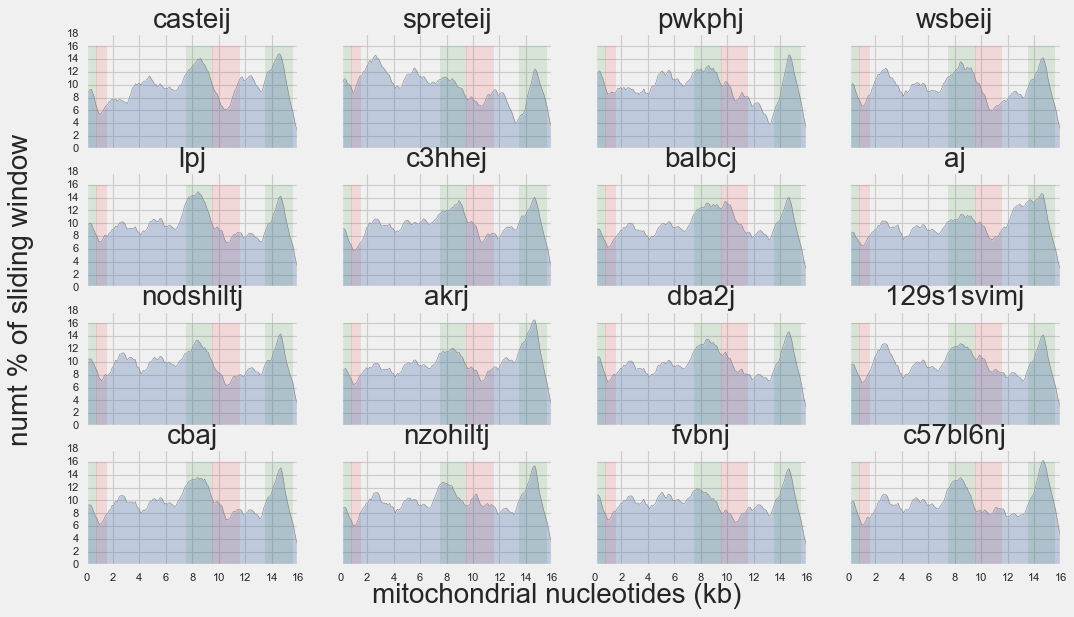

In [88]:
#sliding window
def sliding_window(numts_df,step_size):
    global row_tracker
    global column_tracker
    global indexer
    indexer+=1
    mt_size=int(mtdnas.loc[dfs.index.values[indexer].split('_')[-1]]['Size(Mb)']*1000000)
    window_size=int(mt_size/10)
    numts_df=numts_df.sort_values(by='mt_start')
    numts_df=numts_df.loc[numts_df['mt_start']<mt_size-1]
    ranges=numts_df.apply(lambda row: list(np.arange(row['mt_start'],(row['mt_start']+row['mt_length']))),axis=1)
    merged=[]
    for array in ranges:
        if type(array)==list:
            merged+=array
    merged=pd.Series(merged)
    bp_counts=merged.value_counts().sort_index(ascending=True)
    bp_counts=pd.Series(np.zeros(mt_size)).combine(bp_counts,max,fill_value=0)
    summation=sum(bp_counts)
    bp_involved=[]
    for i in np.arange(0,len(bp_counts),step_size):
        bp_involved.append((sum(bp_counts[i:i+window_size])/summation)*100)
    if column_tracker==4:
        column_tracker+=-4
        row_tracker+=1
    axs[row_tracker,column_tracker].fill_between([0,750],[16,16],color='green',alpha=.1)
    axs[row_tracker,column_tracker].fill_between([750,1500],[16,16],color='red',alpha=.1)
    axs[row_tracker,column_tracker].fill_between([7500,9500],[16,16],color='green',alpha=.1)
    axs[row_tracker,column_tracker].fill_between([9500,11500],[16,16],color='red',alpha=.1)
    axs[row_tracker,column_tracker].fill_between([13500,15500],[16,16],color='green',alpha=.1)
    axs[row_tracker,column_tracker].plot(bp_involved,'grey',linewidth=0.5)
    axs[row_tracker,column_tracker].set_title(dfs.index.values[indexer].split('_')[-1],fontsize=25)
    axs[row_tracker,column_tracker].fill_between(np.arange(0,len(bp_involved)),bp_involved,alpha=0.3)
    axs[row_tracker,column_tracker].set_xlim(0,16000)
    axs[row_tracker,column_tracker].set_xticklabels(np.arange(0,20,2))
    column_tracker+=1
    return bp_involved

plt.style.use('fivethirtyeight')    
fig,axs=plt.subplots(4,4,figsize=(14,8),sharey=True,sharex=True)
fig.text(0.5, 0.01, 'mitochondrial nucleotides (kb)', ha='center',fontsize=25)
fig.text(0.01, 0.5, 'numt % of sliding window', va='center', rotation='vertical',fontsize=25)
row_tracker=0
column_tracker=0
indexer=-1
bps_involved=dfs.apply(sliding_window, args=(1,))
plt.savefig('../../results/mt_sliding_windows.png', dpi=400)